# **EDA**

-----
### Imports

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandasql import sqldf

------
## Read in the Data

In [81]:
reviews = pd.read_csv('../data/reviews_cleaned.csv', low_memory=False)
reviews.head()

,listing_id,review_id,date,reviewer_id,reviewer_name,comments
0,3781,37776825.0,2015-07-10,36059247.0,Greg,The apartment was as advertised and Frank was ...
1,3781,41842494.0,2015-08-09,10459388.0,Tai,It was a pleasure to stay at Frank's place. Th...
2,3781,45282151.0,2015-09-01,12264652.0,Damien,The apartment description is entirely faithful...
3,3781,49022647.0,2015-09-30,41426327.0,Mike,Thoroughly enjoyed my time at Frank's home. Ha...
4,3781,52503327.0,2015-10-30,15151513.0,Ivan,Great value for the money! This location has e...


In [82]:
reviews.dtypes

listing_id        object
review_id        float64
date              object
reviewer_id      float64
reviewer_name     object
comments          object
dtype: object

In [83]:
# ensuring date column is correct data type (wasn't retained when csv read in)
pd.to_datetime(reviews['date'], errors = 'coerce')

0        2015-07-10
1        2015-08-09
2        2015-09-01
3        2015-09-30
4        2015-10-30
            ...    
230276   2022-05-12
230277   2022-05-22
230278   2022-05-29
230279   2022-06-08
230280   2022-06-10
Name: date, Length: 230281, dtype: datetime64[ns]

In [84]:
reviews.dtypes

listing_id        object
review_id        float64
date              object
reviewer_id      float64
reviewer_name     object
comments          object
dtype: object

In [85]:
listings = pd.read_csv('../data/listings_cleaned.csv')
listings.head(2)

,id,last_scraped,name,description,host_id,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,...,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bathrooms,bathrooms_shared,amenities_count,host_verifications_count
0,3781,2021-09-19,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,4804,Frank,2008-12-03,3,100.0,0,...,0,1,1,0,0,0.29,1.0,0,31,3
1,5506,2021-09-19,** Private! Minutes to center!**,"Private guest room with private bath, You do n...",8229,Terry,2009-02-19,3,100.0,1,...,0,10,10,0,0,0.90,1.0,0,30,4


In [86]:
listings.dtypes

id                                                int64
last_scraped                                     object
name                                             object
description                                      object
host_id                                           int64
host_name                                        object
host_since                                       object
host_response_time                                int64
host_response_rate                              float64
host_is_superhost                                 int64
abnb_host_listings_count                        float64
host_verifications                               object
host_has_profile_pic                              int64
host_identity_verified                            int64
neighborhood                                     object
latitude                                        float64
longitude                                       float64
property_type                                   

In [87]:
# converting date columns to date time
# and breaking out by year and month
# for analysis
listings['last_scraped'] = pd.to_datetime(listings['last_scraped'],
                                          format = '%Y-%m-%d',
                                          errors = 'coerce')

In [88]:
listings['last_scraped_year'] = listings['last_scraped'].dt.year 
listings['last_scraped_month'] = listings['last_scraped'].dt.month
listings[['last_scraped_year','last_scraped_month']].head(3)

,last_scraped_year,last_scraped_month
0,2021,9
1,2021,9
2,2021,9


In [89]:
listings['host_since'] = pd.to_datetime(listings['host_since'],
                                          format = '%Y-%m-%d',
                                          errors = 'coerce')
listings['host_since_year'] = listings['host_since'].dt.year 
listings['host_since_month'] = listings['host_since'].dt.month

In [90]:
listings['calendar_last_scraped'] = pd.to_datetime(listings['calendar_last_scraped'],
                                          format = '%Y-%m-%d',
                                          errors = 'coerce')
listings['calendar_last_scraped_year'] = listings['calendar_last_scraped'].dt.year 
listings['calendar_last_scraped_month'] = listings['calendar_last_scraped'].dt.month

In [91]:
listings['first_review'] = pd.to_datetime(listings['first_review'],
                                          format = '%Y-%m-%d',
                                          errors = 'coerce')
listings['first_review_year'] = listings['first_review'].dt.year 
listings['first_review_month'] = listings['first_review'].dt.month

In [92]:
listings['last_review'] = pd.to_datetime(listings['last_review'],
                                          format = '%Y-%m-%d',
                                          errors = 'coerce')
listings['last_review_year'] = listings['last_review'].dt.year 
listings['last_review_month'] = listings['last_review'].dt.month

In [93]:
listings.dtypes

id                                                       int64
last_scraped                                    datetime64[ns]
name                                                    object
description                                             object
host_id                                                  int64
host_name                                               object
host_since                                      datetime64[ns]
host_response_time                                       int64
host_response_rate                                     float64
host_is_superhost                                        int64
abnb_host_listings_count                               float64
host_verifications                                      object
host_has_profile_pic                                     int64
host_identity_verified                                   int64
neighborhood                                            object
latitude                                               

-------
### **Exploring Listings Data Frame**

In [94]:
sql = """
SELECT *
FROM listings
LIMIT 5;
"""

df = sqldf(sql)
df.head()

,id,last_scraped,name,description,host_id,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,...,last_scraped_year,last_scraped_month,host_since_year,host_since_month,calendar_last_scraped_year,calendar_last_scraped_month,first_review_year,first_review_month,last_review_year,last_review_month
0,3781,2021-09-19 00:00:00.000000,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,4804,Frank,2008-12-03 00:00:00.000000,3,100.0,0,...,2021,9,2008,12,2021,9,2015,10,2021,7
1,5506,2021-09-19 00:00:00.000000,** Private! Minutes to center!**,"Private guest room with private bath, You do n...",8229,Terry,2009-02-19 00:00:00.000000,3,100.0,1,...,2021,9,2009,2,2021,9,2011,10,2021,7
2,6695,2021-09-19 00:00:00.000000,Home Away from Home! Condo,"Comfortable, Fully Equipped private apartment...",8229,Terry,2009-02-19 00:00:00.000000,3,100.0,1,...,2021,9,2009,2,2021,9,2014,8,2019,11
3,8789,2021-09-19 00:00:00.000000,Curved Glass Studio/1bd facing Park,This unit is for sale. There will need to be o...,26988,Anne,2009-07-22 00:00:00.000000,3,100.0,1,...,2021,9,2009,7,2021,9,2014,12,2019,9
4,10730,2021-09-19 00:00:00.000000,Bright 1bed facing Golden Dome,"Bright, spacious unit, new galley kitchen, new...",26988,Anne,2009-07-22 00:00:00.000000,3,100.0,1,...,2021,9,2009,7,2021,9,2015,3,2020,4


-----
### Overall 

In [146]:
sql = """
SELECT COUNT(DISTINCT id) AS distinct_listings, COUNT(id) AS all_listings
FROM listings;
"""

df = sqldf(sql)
df.head()

,distinct_listings,all_listings
0,4225,10664


In [149]:
listings.describe()
# earliest hosts from 2008 (AirBNB launched August 2008, VRBO in 1995)
# earliest reviews from 2009

,id,host_id,host_response_time,host_response_rate,host_is_superhost,abnb_host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,last_scraped_year,last_scraped_month,host_since_year,host_since_month,calendar_last_scraped_year,calendar_last_scraped_month,first_review_year,first_review_month,last_review_year,last_review_month
count,1.066400e+04,1.066400e+04,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000,...,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000
mean,1.572555e+16,1.095121e+08,2.673668,96.265566,0.337678,49.717086,0.998312,0.828395,42.339632,-71.084715,...,2021.575863,7.214741,2015.569674,6.866185,2021.575863,7.214741,2018.437172,6.659227,2020.673106,6.924981
std,9.482963e+16,1.230167e+08,0.688756,12.588354,0.472940,280.307104,0.041052,0.377055,0.029881,0.034718,...,0.494235,3.190948,2.806896,3.249482,0.494235,3.190948,2.461900,3.104658,1.521808,3.250895
min,3.781000e+03,4.804000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.231170,-71.201970,...,2021.000000,3.000000,2008.000000,1.000000,2021.000000,3.000000,2009.000000,1.000000,2013.000000,1.000000
25%,1.494335e+07,1.594356e+07,3.000000,99.000000,0.000000,1.000000,1.000000,1.000000,42.321045,-71.107563,...,2021.000000,6.000000,2014.000000,4.000000,2021.000000,6.000000,2017.000000,4.000000,2020.000000,5.000000
50%,2.925670e+07,4.582441e+07,3.000000,100.000000,0.000000,4.000000,1.000000,1.000000,42.345460,-71.077500,...,2022.000000,6.000000,2015.000000,7.000000,2022.000000,6.000000,2019.000000,7.000000,2021.000000,7.000000
75%,4.669647e+07,1.889399e+08,3.000000,100.000000,1.000000,20.000000,1.000000,1.000000,42.359020,-71.061910,...,2022.000000,9.000000,2018.000000,10.000000,2022.000000,9.000000,2021.000000,9.000000,2022.000000,10.000000
max,6.451035e+17,4.623882e+08,3.000000,100.000000,1.000000,3322.000000,1.000000,1.000000,42.410821,-70.920020,...,2022.000000,12.000000,2022.000000,12.000000,2022.000000,12.000000,2022.000000,12.000000,2022.000000,12.000000


In [158]:
listings[['number_of_reviews', 'reviews_per_month']].describe()

,number_of_reviews,reviews_per_month
count,10664.000000,10664.000000
mean,57.706114,1.916011
std,89.313727,4.340045
min,1.000000,0.010000
25%,5.000000,0.280000
50%,22.000000,1.000000
75%,72.000000,2.580000
max,1071.000000,219.000000


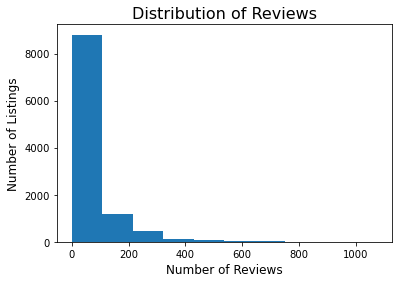

In [162]:
plt.hist(x = listings['number_of_reviews'])
plt.title('Distribution of Reviews', fontsize = 16)
plt.xlabel('Number of Reviews', fontsize = 12)
plt.ylabel('Number of Listings', fontsize = 12);

In [163]:
sql = """
SELECT AVG(rating) AS avg_rating, MIN(rating) AS min_rating, MAX(rating) AS max_rating
FROM listings;
"""

df = sqldf(sql)
df.head()

,avg_rating,min_rating,max_rating
0,4.677944,0.0,5.0


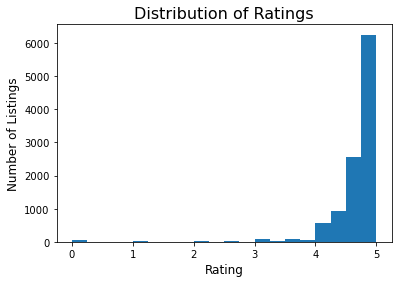

In [199]:
plt.hist(x = listings['rating'], bins = 20)
plt.title('Distribution of Ratings', fontsize = 16)
plt.xlabel('Rating', fontsize = 12)
plt.ylabel('Number of Listings', fontsize = 12);

In [105]:
sql = """
SELECT COUNT(rating) AS perfect_ratings
FROM listings
WHERE rating = 5;
"""

df = sqldf(sql)
df.head()

,perfect_ratings
0,2170


In [114]:
sql = """
SELECT COUNT(rating) AS between_4_5
FROM listings
WHERE rating BETWEEN 4 AND 5;
"""

df = sqldf(sql)
df.head()

,between_4_5
0,10310


In [115]:
sql = """
SELECT COUNT(rating) AS under_4
FROM listings
WHERE rating < 4;
"""

df = sqldf(sql)
df.head()

,under_4
0,354


/Users/petermurphy/opt/anaconda3/envs/dsi/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


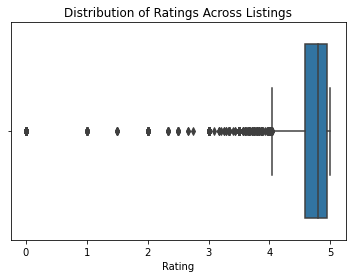

In [202]:
sns.boxplot(listings['rating'])
plt.title('Distribution of Ratings Across Listings')
plt.xlabel('Rating');

In [127]:
sql = """
SELECT AVG([price]) AS avg_price, MIN(price) AS min_price, MAX(price) AS max_price
FROM listings;
"""

df = sqldf(sql)
df.head()

,avg_price,min_price,max_price
0,32.129501,0.0,999.0


/Users/petermurphy/opt/anaconda3/envs/dsi/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


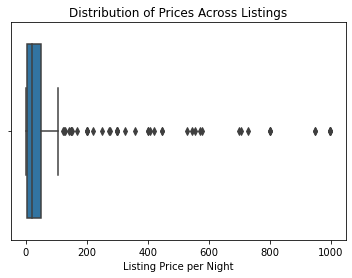

In [123]:
sns.boxplot(listings['price'])
plt.title('Distribution of Prices Across Listings')
plt.xlabel('Listing Price per Night');

In [137]:
listings['price'].describe()

count    10664.000000
mean        32.129501
std         45.801612
min          0.000000
25%          5.000000
50%         20.000000
75%         50.000000
max        999.000000
Name: price, dtype: float64

In [141]:
# upper bound 
50 + (1.5*45)

117.5

In [144]:
sql = """
SELECT COUNT(DISTINCT id) AS potential_outliers
FROM listings
WHERE price >= 117.5;
"""

df = sqldf(sql)
df.head()

,potential_outliers
0,32


In [143]:
sql = """
SELECT COUNT(DISTINCT id) AS distinct_listings_at_0, COUNT(id) AS listings_at_0
FROM listings
WHERE price = 0;
"""

df = sqldf(sql)
df.head()

,distinct_listings_at_0,listings_at_0
0,658,1309


In [135]:
sql = """
SELECT COUNT(DISTINCT id) AS distinct_listings_at_0, COUNT(id) AS listings_at_0
FROM listings
WHERE price = 0;
"""

df = sqldf(sql)
df.head()

,distinct_listings_at_0,listings_at_0
0,658,1309


In [145]:
listings[listings['price'] == 0][['price','rating','host_name']] # significant amount of properties with $0 price per night

,price,rating,host_name
4,0.0,4.78,Anne
9,0.0,4.97,Robert
12,0.0,4.73,Michelle
14,0.0,4.75,Michelle
16,0.0,4.41,Hermina
...,...,...,...
10649,0.0,4.70,Julia
10655,0.0,4.90,Maria And Jose
10659,0.0,4.95,Aziz
10660,0.0,5.00,Cici


In [173]:
sql = """
SELECT AVG(amenities_count) AS avg_num_amenities, MIN(amenities_count) AS min_amenities, MAX(amenities_count) AS max_amenities
FROM listings
"""

df = sqldf(sql)
df.head()

,avg_num_amenities,min_amenities,max_amenities
0,29.765848,1,93


In [174]:
sql = """
SELECT AVG(amenities_count) AS avg_num_amenities
FROM listings
WHERE price = 0
"""

df = sqldf(sql)
df.head()

,avg_num_amenities
0,26.159664


In [175]:
sql = """
SELECT AVG(amenities_count) AS avg_num_amenities 
FROM listings
WHERE price > 117.5
"""

df = sqldf(sql)
df.head()

,avg_num_amenities
0,32.75


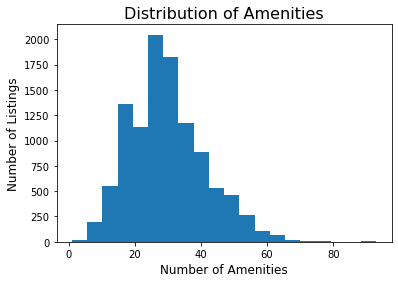

In [200]:
plt.hist(x = listings['amenities_count'], bins=20)
plt.title('Distribution of Amenities', fontsize = 16)
plt.xlabel('Number of Amenities', fontsize = 12)
plt.ylabel('Number of Listings', fontsize = 12);

In [191]:
listings['property_type'].value_counts()[:16]

Entire rental unit                     4317
Private room in rental unit            1536
Private room in residential home        944
Entire condominium (condo)              654
Private room in home                    512
Entire residential home                 345
Entire condo                            329
Entire serviced apartment               296
Entire guest suite                      215
Entire home                             211
Private room in condominium (condo)     177
Private room in townhouse               159
Room in boutique hotel                  159
Private room in bed and breakfast       145
Entire townhouse                        142
Entire loft                             103
Name: property_type, dtype: int64

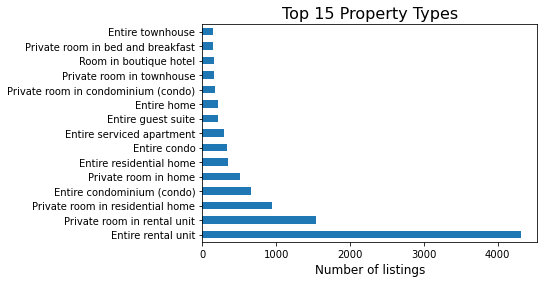

In [195]:
listings['property_type'].value_counts()[:15].plot(kind = 'barh')
plt.title('Top 15 Property Types', fontsize = 16)
plt.xlabel('Number of listings', fontsize = 12);

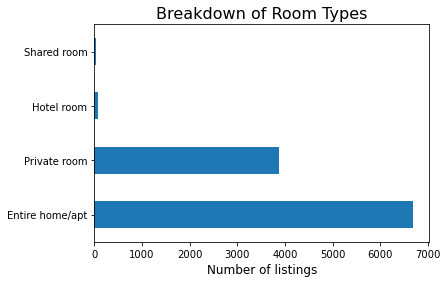

In [207]:
listings['room_type'].value_counts().plot(kind = 'barh')
plt.title('Breakdown of Room Types', fontsize = 16)
plt.xlabel('Number of listings', fontsize = 12);

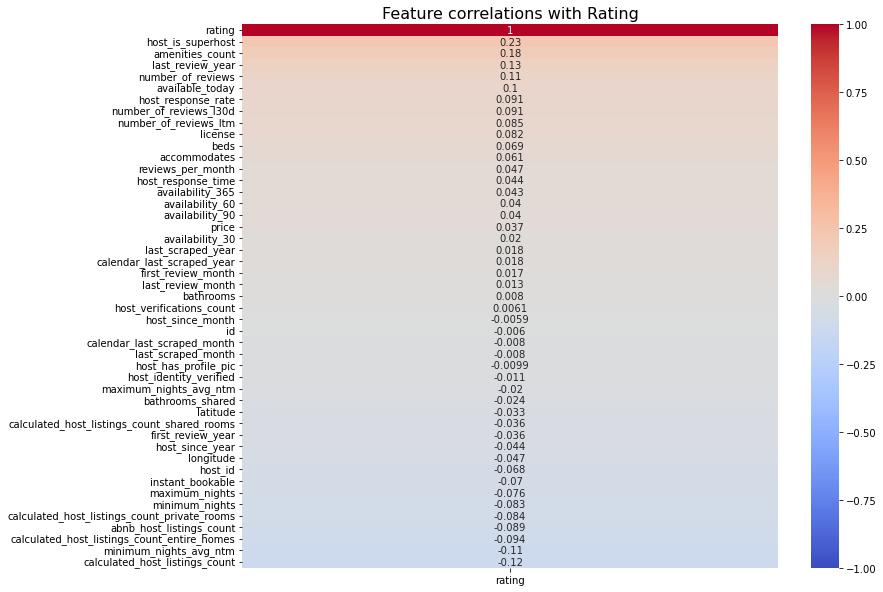

In [227]:
# checking correlations to target
plt.figure(figsize = (12, 10))
sns.heatmap(listings.corr()[['rating']].sort_values(by = 'rating', ascending = False),
            annot = True,
            vmin = -1,
            vmax = 1,
           cmap = 'coolwarm')
plt.title('Feature correlations with Rating', fontsize = 16);
# no strong correlations are immeditely jumping out

----
### By Hosts

In [229]:
sql = """
SELECT COUNT(DISTINCT host_id) AS num_hosts
FROM listings
"""

host = sqldf(sql)
host.head()

,num_hosts
0,1733


In [233]:
sql = """
SELECT DISTINCT(host_id), host_name, COUNT(id) AS number_listings
FROM listings
GROUP BY host_id
ORDER BY COUNT(id) DESC
"""

host = sqldf(sql)
host.head(10)

,host_id,host_name,number_listings
0,22348222,Maverick,248
1,212359760,Evonify,171
2,814298,Thatch,171
3,275849638,Steven,122
4,331225367,Boston Strong,109
5,18517776,Huggy,108
6,30283594,Global Luxury Suites,104
7,365116307,Brian + Heather,103
8,71783,Lance,94
9,285344759,Bv,93


In [40]:
sql = """
SELECT DISTINCT(host_id), host_name, host_since
FROM listings
ORDER BY host_since
"""

host = sqldf(sql)
host.head(10)

,host_id,host_name,host_since
0,4804,Frank,2008-12-03 00:00:00.000000
1,6094,Matt,2009-01-06 00:00:00.000000
2,7969,Carolyn,2009-02-15 00:00:00.000000
3,8229,Terry,2009-02-19 00:00:00.000000
4,26988,Anne,2009-07-22 00:00:00.000000
5,38997,Michelle,2009-09-16 00:00:00.000000
6,63575,Kate,2009-12-16 00:00:00.000000
7,69587,Boris & Susan,2010-01-11 00:00:00.000000
8,69838,Mara,2010-01-12 00:00:00.000000
9,71783,Lance,2010-01-19 00:00:00.000000


In [244]:
sql = """
SELECT host_is_superhost, AVG(host_response_rate) AS avg_response_rate, AVG(rating) AS avg_rating, AVG(price) AS avg_price
FROM listings
GROUP BY host_is_superhost
"""

host = sqldf(sql)
host.head()

,host_is_superhost,avg_response_rate,avg_rating,avg_price
0,0,94.986125,4.595628,32.520600
1,1,98.775062,4.839400,31.362399


licenses

In [272]:
sql = """
SELECT COUNT(*) as num_superhosts
FROM listings
WHERE host_is_superhost = 1
"""

host = sqldf(sql)
host.head()

,num_superhosts
0,3601


In [273]:
sql = """
SELECT COUNT(*) as num_non_superhosts
FROM listings
WHERE host_is_superhost = 0
"""

host = sqldf(sql)
host.head()

,num_non_superhosts
0,7063


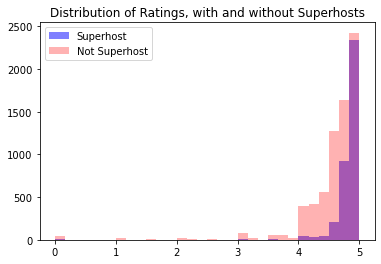

In [262]:
superhost = listings[listings['host_is_superhost'] == 1]
not_superhost = listings[listings['host_is_superhost'] == 0]

plt.hist(superhost['rating'], color = 'b', alpha = 0.5, label = 'Superhost', bins = 30)
plt.hist(not_superhost['rating'], color = 'r', alpha = 0.3, label = 'Not Superhost', bins = 30)
plt.legend()
plt.title('Distribution of Ratings, with and without Superhosts');

In [275]:
sql = """
SELECT license, AVG(host_response_rate) AS avg_response_rate, AVG(rating) AS avg_rating, AVG(price) AS avg_price
FROM listings
GROUP BY license
"""

host = sqldf(sql)
host.head()

,license,avg_response_rate,avg_rating,avg_price
0,0,94.852800,4.624614,26.754244
1,1,97.095727,4.709282,35.288075


In [280]:
sql = """
SELECT COUNT(*) as num_non_licensed_hosts
FROM listings
WHERE license = 0
"""

host = sqldf(sql)
host.head()

,num_non_licensed_hosts
0,3947


In [282]:
sql = """
SELECT COUNT(*) as num_licensed_hosts
FROM listings
WHERE license = 1
"""

host = sqldf(sql)
host.head()

,num_licensed_hosts
0,6717


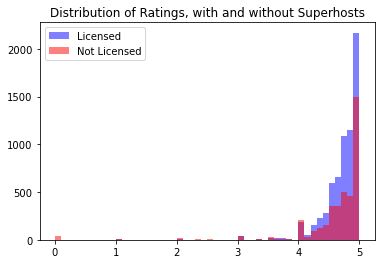

In [291]:
licensed = listings[listings['license'] == 1]
not_licensed = listings[listings['license'] == 0]

plt.hist(licensed['rating'], color = 'b', alpha = 0.5, label = 'Licensed', bins = 50)
plt.hist(not_licensed['rating'], color = 'r', alpha = 0.5, label = 'Not Licensed', bins = 50)
plt.legend()
plt.title('Distribution of Ratings, with and without Superhosts');

In [ ]:
sql = """
SELECT COUNT(*) as num_licensed_hosts
FROM listings
WHERE license = 1
"""

host = sqldf(sql)
host.head()

-----
### By Neighborhood

In [72]:
sql = """
SELECT property_type, COUNT(property_type), AVG(review_scores_rating)
FROM listings
GROUP BY property_type
ORDER BY property_type
"""

prop = sqldf(sql)
prop.head()

,property_type,COUNT(property_type),AVG(review_scores_rating)
0,Boat,26,4.873846
1,Castle,1,4.850000
2,Entire bed and breakfast,4,4.340000
3,Entire bungalow,1,4.810000
4,Entire condo,329,4.770821


activity (nights booked, averhage price / night, )

-----
### Exploring Reviews

In [1]:
reviews.head()

NameError: name 'reviews' is not defined

reviews per user

In [ ]:
length of reviews

In [ ]:
reviews per listing

In [ ]:
all the typical NLP EDA 
word counts
most common words
stop words?

-------
Joining the tables

-----
maps w latitutde and longitude

look at different categories with heat map type look


In [ ]:
either or type categories can do cool EDA kike below

In [34]:
df['exercise_induced_angina'].value_counts()

0    193
1     95
Name: exercise_induced_angina, dtype: int64

You can also use `.groupby()` + `.describe()` for cohort analysis

In [36]:
df['has_heart_disease'].value_counts(normalize=True)

0    0.541667
1    0.458333
Name: has_heart_disease, dtype: float64

In [37]:
df.groupby('has_heart_disease').describe()

age                                                     \
                   count       mean       std   min   25%   50%   75%   max   
has_heart_disease                                                             
0                  156.0  52.506410  9.602081  29.0  44.0  52.0  59.0  76.0   
1                  132.0  56.772727  7.994837  35.0  53.0  58.0  62.0  77.0   

                  sex_male            ... slope          ca            \
                     count      mean  ...   75%  max  count      mean   
has_heart_disease                     ...                               
0                    156.0  0.557692  ...   2.0  3.0  156.0  0.262821   
1                    132.0  0.818182  ...   2.0  3.0  132.0  1.121212   

                                                      
                        std  min  25%  50%  75%  max  
has_heart_disease                                     
0                  0.602277  0.0  0.0  0.0  0.0  3.0  
1                  1.004040  0.0  0.0  1.0  2.0  3.0  

[2 rows x 88 columns]

In [39]:
# .T transposes
df.groupby('has_heart_disease').describe().T

has_heart_disease           0           1
age count          156.000000  132.000000
    mean            52.506410   56.772727
    std              9.602081    7.994837
    min             29.000000   35.000000
    25%             44.000000   53.000000
...                       ...         ...
ca  min              0.000000    0.000000
    25%              0.000000    0.000000
    50%              0.000000    1.000000
    75%              0.000000    2.000000
    max              3.000000    3.000000

[88 rows x 2 columns]

In [40]:
df.groupby('has_heart_disease').mean()

,age,sex_male,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,old_peak,slope,ca
has_heart_disease,,,,,,,,,,,
0,52.506410,0.557692,129.294872,243.179487,0.141026,0.852564,158.673077,0.147436,0.595513,1.416667,0.262821
1,56.772727,0.818182,134.674242,251.871212,0.151515,1.174242,138.825758,0.545455,1.589394,1.833333,1.121212


In [41]:
df.groupby('has_heart_disease').mean().T

has_heart_disease,0,1
age,52.506410,56.772727
sex_male,0.557692,0.818182
resting_blood_pressure,129.294872,134.674242
cholesterol,243.179487,251.871212
fasting_blood_sugar,0.141026,0.151515
resting_ecg,0.852564,1.174242
max_heart_rate,158.673077,138.825758
exercise_induced_angina,0.147436,0.545455
old_peak,0.595513,1.589394
slope,1.416667,1.833333


In [45]:
df.groupby(['has_heart_disease', 'thallium_stress_test']).mean().T

has_heart_disease                 0                                   1  \
thallium_stress_test          fixed      normal  reversable       fixed   
age                       56.000000   51.806452   55.038462   57.000000   
sex_male                   1.000000    0.459677    0.923077    0.916667   
resting_blood_pressure   134.666667  128.903226  129.923077  138.083333   
cholesterol              207.166667  244.266129  246.307692  236.916667   
fasting_blood_sugar        0.166667    0.120968    0.230769    0.333333   
resting_ecg                1.000000    0.879032    0.692308    1.250000   
max_heart_rate           147.333333  159.814516  155.846154  129.000000   
exercise_induced_angina    0.166667    0.129032    0.230769    0.583333   
old_peak                   1.083333    0.556452    0.669231    1.741667   
slope                      2.000000    1.379032    1.461538    2.083333   
ca                         0.000000    0.274194    0.269231    1.500000   

has_heart_disease                                
thallium_stress_test         normal  reversable  
age                       59.028571   55.811765  
sex_male                   0.685714    0.858824  
resting_blood_pressure   132.114286  135.247059  
cholesterol              258.885714  251.094118  
fasting_blood_sugar        0.114286    0.141176  
resting_ecg                1.400000    1.070588  
max_heart_rate           139.742857  139.835294  
exercise_induced_angina    0.428571    0.588235  
old_peak                   1.211429    1.723529  
slope                      1.714286    1.847059  
ca                         1.085714    1.082353